In [1]:
import torch

In [2]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [3]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [4]:
device = 'cuda'

In [5]:
X = X.to(device)
Y = Y.to(device)

In [6]:
import torch.nn as nn

## Define the neural network architecture

In [7]:
class MyNeuralNetwork(nn.Module): 
    def __init__(self):
        super().__init__()
        self.input_to_hidden = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)
    def forward(self, x):
        x = self.input_to_hidden(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

## Initialzing Weight

In [8]:
torch.manual_seed(0)

In [9]:
my_net = MyNeuralNetwork().to(device)

In [10]:
my_net.input_to_hidden.weight

Parameter containing:
tensor([[-0.0053,  0.3793],
        [-0.5820, -0.5204],
        [-0.2723,  0.1896],
        [-0.0140,  0.5607],
        [-0.0628,  0.1871],
        [-0.2137, -0.1390],
        [-0.6755, -0.4683],
        [-0.2915,  0.0262]], device='cuda:0', requires_grad=True)

In [11]:
my_net.parameters()

<generator object Module.parameters at 0x000001DB3220B8C8>

In [12]:
for par in my_net.parameters():
    print(par)

Parameter containing:
tensor([[-0.0053,  0.3793],
        [-0.5820, -0.5204],
        [-0.2723,  0.1896],
        [-0.0140,  0.5607],
        [-0.0628,  0.1871],
        [-0.2137, -0.1390],
        [-0.6755, -0.4683],
        [-0.2915,  0.0262]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.2795,  0.4243, -0.4794, -0.3079,  0.2568,  0.5872, -0.1455,  0.5291],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0570,  0.0374,  0.3201, -0.3280, -0.2226, -0.0895, -0.1378,  0.3055]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.2292], device='cuda:0', requires_grad=True)


In [13]:
class MyNeuralNet(nn.Module):
    def __init__(self):


        super().__init__()
        self.input_to_hidden_layer = nn.Parameter(
            torch.rand(2, 8))
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Parameter(
            torch.rand(8, 1))


    def forward(self, x):


        x = x @ self.input_to_hidden_layer
        x = self.hidden_layer_activation(x)
        x = x @ self.hidden_to_output_layer
        return x


In [14]:
my_net = MyNeuralNet().to(device)

In [15]:
loss_func = nn.MSELoss()

In [16]:
_Y = my_net(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(89.8803, device='cuda:0', grad_fn=<MseLossBackward0>)


In [17]:
from torch.optim import SGD

In [18]:
otp = SGD(my_net.parameters(), lr=0.001)

In [19]:
otp.zero_grad()
loss_value = loss_func(my_net(X),Y)
loss_value.backward()
otp.step()

In [20]:
my_net.parameters()
for par in my_net.parameters():
    print(par)

Parameter containing:
tensor([[ 0.2280,  0.0795, -0.0548,  0.1475,  0.8805,  0.6506,  0.7245,  0.4748],
        [ 0.1937,  0.4995, -0.0703,  0.0663,  0.1834,  0.7288,  0.7718,  0.2167]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[0.4333],
        [0.7460],
        [0.9909],
        [0.6660],
        [0.4617],
        [0.6879],
        [0.0589],
        [0.5186]], device='cuda:0', requires_grad=True)


In [21]:
loss_history = []
for i in range(50):
    otp.zero_grad()
    loss_value = loss_func(my_net(X),Y)
    loss_value.backward()
    print(loss_value)
    otp.step()
    loss_history.append(loss_value.item())

tensor(10.0240, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(2.2699, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5769, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.1543, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0428, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0126, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn

Text(0, 0.5, 'loss value')

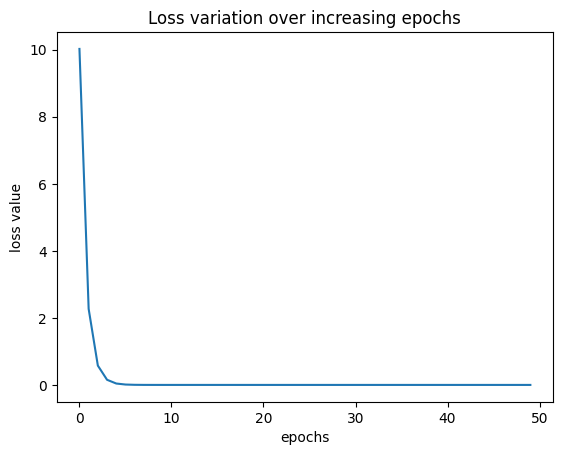

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')